# Inflecting points in a Hypersphere

In this setting, we consider the collection of points in a unit hypersphere in $\mathbb{R}^n$. For visualization purposes, we will plot examples in $\mathbb{R}^2$ and $\mathbb{R}^3$.

Here we will specify an algorithm to choose points in a hypersphere that are a fixed distance $d$ apart.

1. Start by sampling a random point $x$ on the surface of the unit hypersphere. Note that $\Vert x\Vert = 1$ because it lies on the surace of a unit hypersphere.
3. Let our two points be $x_1 = \frac{d}{2}x$ and $x_2 = -\frac{d}{2}x$. Note that $\Vert x_1 - x_2\Vert = d$.

Below is a diagram in $\mathbb{R}^3$. The black wireframe sphere corresponds to the unit hypersphere, the <font color=red>red</font> points corresponds to $x$ and $-x$, the <font color=geen>green</font> points corresponds to $x_1$ and $x_2$, and the <font color=geen>green</font> wireframe sphere correspond to one SD around $x_1$ and $x_2$.

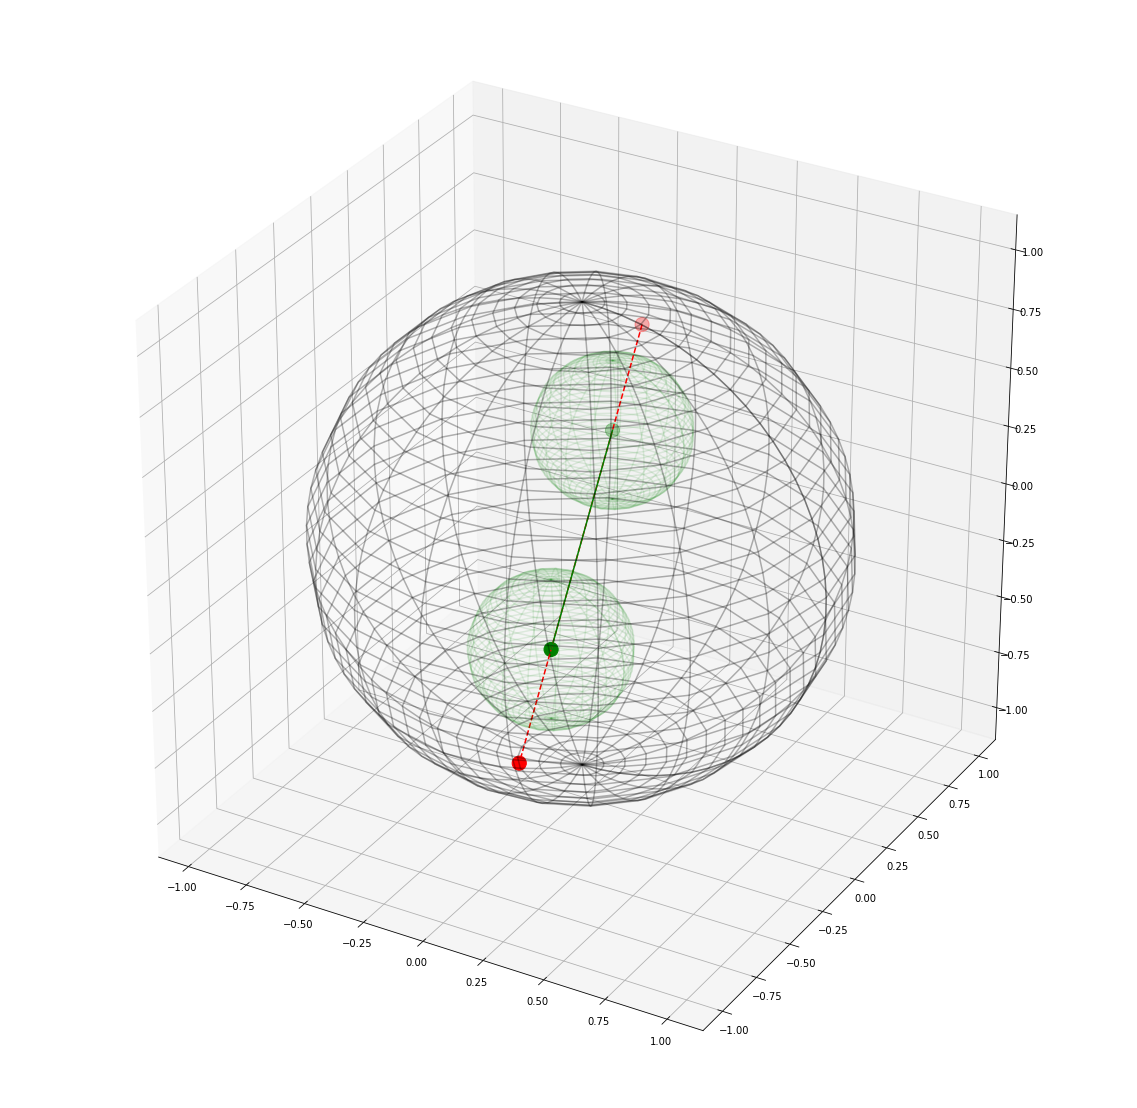

In [149]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')

# Make data
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 40)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_wireframe(x, y, z, color='k', rstride=1, cstride=1, alpha=0.3)

magnitude = lambda x: np.linalg.norm(x)
direction = lambda x: x / magnitude(x)

# Sample random points on hypersphere
point = direction(np.random.uniform(-1, 1, size=3))
ax.scatter(*np.vstack([point, -point]).T, color='r', s=200)
ax.plot(*np.vstack([point, -point]).T, color='r', linestyle='--')

# Choose a distance between 0 and 2
distance = 1.0

point_1 = distance * point / 2.0
point_2 = distance * -point / 2.0
ax.scatter(*np.vstack([point_1, point_2]).T, color='g', s=200)
ax.plot(*np.vstack([point_1, point_2]).T, color='g', linestyle='-')

# Choose an SD
sd = 0.3
ax.plot_wireframe(sd * x + point_1[0], sd * y + point_1[1], sd * z + point_1[2],
                color='g', rstride=1, cstride=1, alpha=0.1)
ax.plot_wireframe(sd * x + point_2[0], sd * y + point_2[1], sd * z + point_2[2],
                color='g', rstride=1, cstride=1, alpha=0.1)

plt.show()